## Работа с данными ##

In [1]:
import scipy.signal as scp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
df = pd.read_table('data/dst.dat', sep="\s+")



In [3]:
data = df.groupby("DATE").mean().reset_index()
data

,DATE,DOY,Dst
0,1958-01-01,1.0,-98.250000
1,1958-01-02,2.0,-59.708333
2,1958-01-03,3.0,-28.250000
3,1958-01-04,4.0,-11.583333
4,1958-01-05,5.0,1.166667
...,...,...,...
20814,2014-12-27,361.0,-31.125000
20815,2014-12-28,362.0,-16.583333
20816,2014-12-29,363.0,-23.541667
20817,2014-12-30,364.0,-29.166667


Фильтрация данных

In [4]:
def filt(data, day, rad):
    data["filt"] = (((data["DOY"] - day) % 365) <= rad) | ((data["DOY"] - day) % 365 >= 365 - rad)
    data["filted"] = data["Dst"] * data["filt"] + (1 - data["filt"]) * data["Dst"].mean()
    


In [5]:
filt(data, 81, 30)
data

,DATE,DOY,Dst,filt,filted
0,1958-01-01,1.0,-98.250000,False,-15.281854
1,1958-01-02,2.0,-59.708333,False,-15.281854
2,1958-01-03,3.0,-28.250000,False,-15.281854
3,1958-01-04,4.0,-11.583333,False,-15.281854
4,1958-01-05,5.0,1.166667,False,-15.281854
...,...,...,...,...,...
20814,2014-12-27,361.0,-31.125000,False,-15.281854
20815,2014-12-28,362.0,-16.583333,False,-15.281854
20816,2014-12-29,363.0,-23.541667,False,-15.281854
20817,2014-12-30,364.0,-29.166667,False,-15.281854


Фурье

In [11]:
def mFFT(arr ,draw = False, x1 = 0, x2 = -1, y2 = -1, energy=False, norm = -1, smth = 0, wr = True):
    '''
    draw - рисовать ли график
    x1, x2, y2 - границы графика
    smth - наличие сглаживания
    norm - число для нормировки, стандартное - длинна массива
    energy - искать ли энергию точки
    ep - точка для поиска энергии
    radius - радиус энергии
    '''
    if x2 == -1:
        x2 = len(arr) // 2
    if norm == -1:
        norm = len(arr)
        
    
    A = np.fft.rfft((arr - np.mean(arr)) / norm)
    
    if draw:
        
        plt.rcParams['axes.grid'] = True
        fig, ax = plt.subplots(2, figsize=(6,4), dpi=150)
        plt.tight_layout()
        
        n = np.arange(len(arr))
        n1 = len(arr) / n[1:]
        
        plt.subplots_adjust(hspace = 0.5)
        
        ax[0].plot(n, arr, '.-')
        ax[0].set_title('$a[n]$') 
        
        ax[1].set_title('$A$')
        if (y2 > 0):
            ax[1].set_ylim(0, y2)
        ax[1].set_xlim(x1, x2)
        if smth > 0:
            ax[1].plot(n1[0 : (len(arr) // 2 - 2 * smth + 1)], smoth(np.abs(A), smth), '-')
        else:
            ax[1].plot(n1[0 : (len(arr) // 2 + 1)], np.abs(A), '-')
        ax[1].set_xlabel('Период (в днях)')
        
        plt.show()
    
    if (energy):
        n = np.arange(len(arr))
        n1 = len(arr) / n[1:]
        
        ep = 29
        radius = 3
        
        # esum = np.abs(A).sum()
        msum = np.abs(A[(np.abs(n1[0 : (len(arr) // 2 + 1)] - ep) <= radius)]).sum()
        en1 = msum
        if (wr):
            print("Energy of", ep, "=", msum )
        
        ep = 183
        radius = 2
        
        # esum = np.abs(A).sum()
        msum = np.abs(A[(np.abs(n1[0 : (len(arr) // 2 + 1)] - ep) <= radius)]).sum()
        en2 = msum
        
        if(wr):
            print("Energy of", ep, "=", msum)
            print("Relation in", ep, "=", en1/en2)
        
        return en1, en2, en1/en2, np.abs(A)
    
    return np.abs(A)

Рисунок энергии

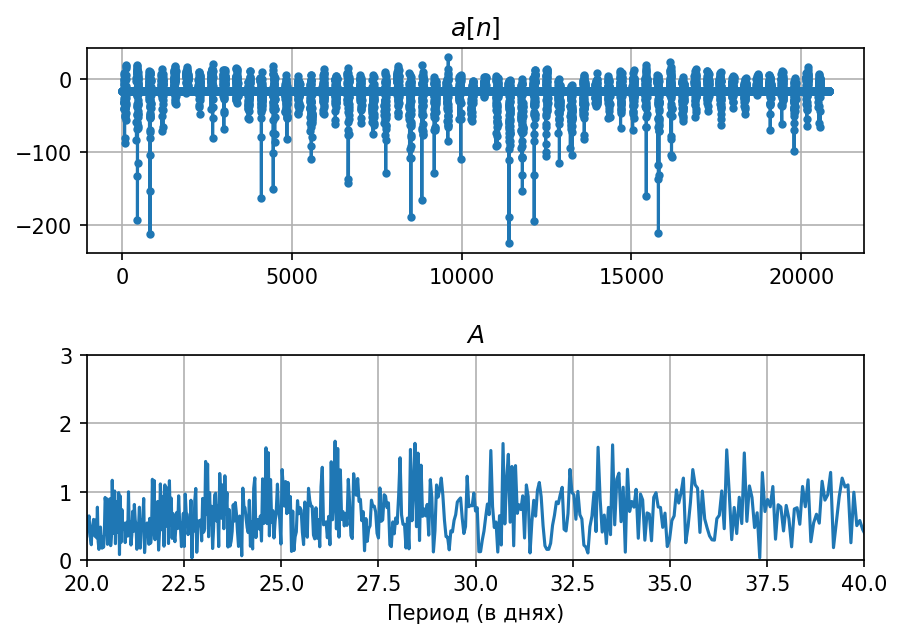

Energy of 29 = 107.98703077711069
Energy of 183 = 7.249176220647081
Relation in 183 = 14.896455471663437


(107.98703077711069,
 7.249176220647081,
 14.896455471663437,
 array([1.10328413e-14, 3.85748559e+00, 4.29255861e-01, ...,
        1.33565323e-01, 1.10564175e-01, 2.10479887e-01]))

In [8]:
filt(data, 83, 30)
mFFT(data["filted"], draw = True, x1 = 20, x2 = 40, y2 = 3, norm = data["filt"].sum(), energy = True)

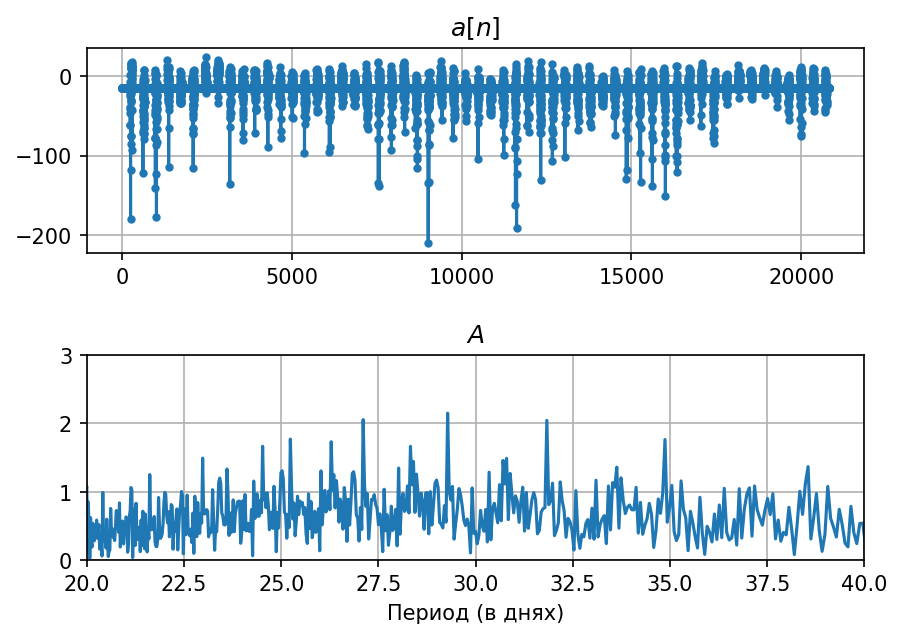

Energy of 29 = 120.4811785997127
Energy of 183 = 5.503728528453776
Relation in 183 = 21.890828731256633


(120.4811785997127,
 5.503728528453776,
 21.890828731256633,
 array([1.80688797e-14, 2.30506871e+00, 7.19825235e-01, ...,
        4.61506847e-02, 1.90855870e-01, 1.21141035e-01]))

In [7]:
filt(data, 266, 30)
mFFT(data["filted"], draw = True, x1 = 20, x2 = 40, y2 = 3, norm = data["filt"].sum(), energy = True)

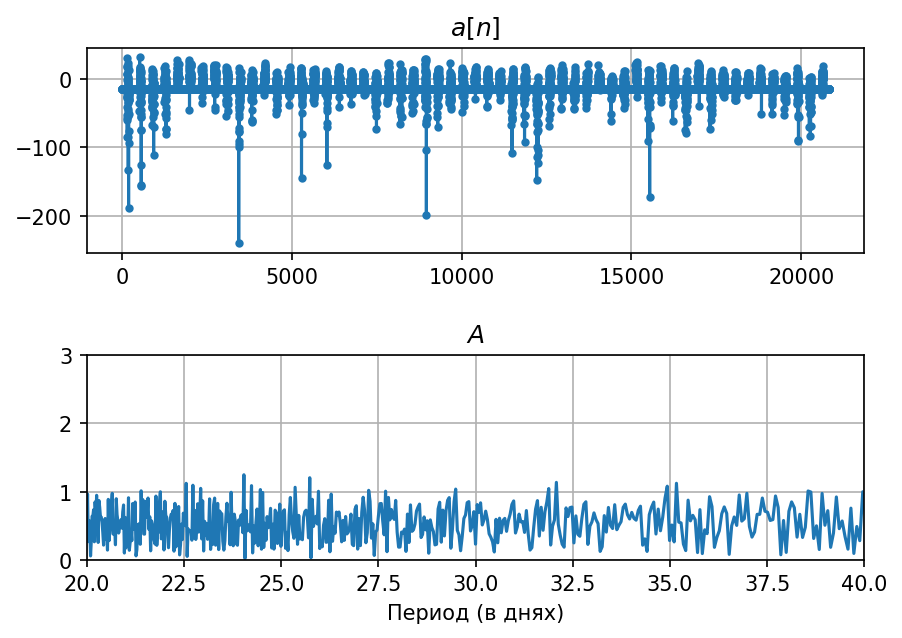

Energy of 29 = 79.80781001362371
Energy of 183 = 6.429016012321131
Relation in 183 = 12.413689724939713


(79.80781001362371,
 6.429016012321131,
 12.413689724939713,
 array([8.39606162e-15, 5.06656389e-01, 1.05681558e+00, ...,
        1.10959666e-01, 1.33674358e-01, 1.15594616e-01]))

In [9]:
filt(data, 173, 30)
mFFT(data["filted"], draw = True, x1 = 20, x2 = 40, y2 = 3, norm = data["filt"].sum(), energy = True)

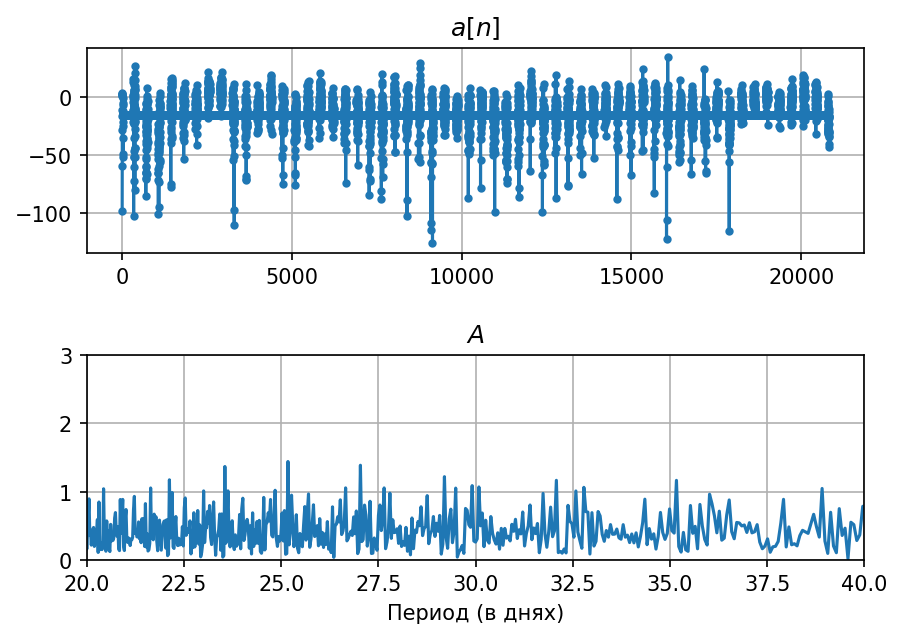

Energy of 29 = 66.21290314394915
Energy of 183 = 4.004652222738359
Relation in 183 = 16.53399582815037


(66.21290314394915,
 4.004652222738359,
 16.53399582815037,
 array([1.05991604e-14, 1.69101479e+00, 6.67148943e-01, ...,
        1.14215691e-01, 7.69548855e-03, 1.20012032e-01]))

In [10]:
filt(data, 356, 30)
mFFT(data["filted"], draw = True, x1 = 20, x2 = 40, y2 = 3, norm = data["filt"].sum(), energy = True)

In [15]:
en1s = []
en2s = []
rels = []
for i in range(73):
    filt(data, 1 + i * 5, 30)
    en1, en2, rel, _ = mFFT(data["filted"], draw = False, x1 = 20, x2 = 40, norm = data["filt"].sum(), energy = True, wr = False)
    en1s.append(en1)
    en2s.append(en2)
    rels.append(rel)
    

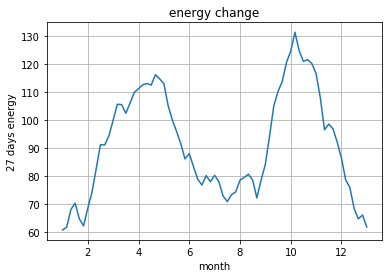

In [16]:
plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
plt.xlabel("month")
plt.ylabel("27 days energy")
plt.title("energy change")
plt.show()

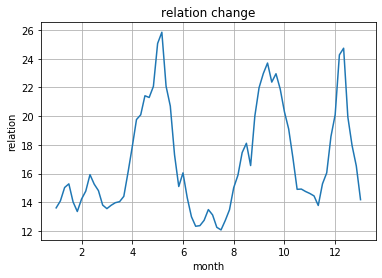

In [17]:
plt.plot( np.arange(1, 13.1, 1 / 6), rels)
plt.xlabel("month")
plt.ylabel("relation")
plt.title("relation change")
plt.show()

Check data

In [86]:
def data_checker(name = 'to_send085.csv'):
    ts = pd.read_csv(name)
    ts["DOY"] = ts["Unnamed: 0"]
    ts["DOY"] = ts["DOY"] % 365 + 1
    #ts["Dst"] = ts["0"]
    
    
    en1s = []
    en2s = []
    rels = []
    for i in range(73):
        filt(data, 1 + i * 5, 30)
        en1, en2, rel, _ = mFFT(data["filted"], draw = False, x1 = 20, x2 = 40, norm = data["filt"].sum(), energy = True, wr = False)
        en1s.append(en1)
        en2s.append(en2)
        rels.append(rel)
        
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
    plt.xlabel("month")
    plt.ylabel("27 days energy")
    plt.title("dst energy change")
    plt.show()
    
    en1s = []
    en2s = []
    rels = []
    for i in range(73):
        filt(ts, 1 + i * 5, 30)
        en1, en2, rel, _ = mFFT(ts["filted"], draw = False, x1 = 20, x2 = 40, norm = data["filt"].sum(), energy = True, wr = False)
        en1s.append(en1)
        en2s.append(en2)
        rels.append(rel)
        
        
    plt.plot( np.arange(1, 13.1, 1 / 6), en1s)
    plt.xlabel("month")
    plt.ylabel("27 days energy")
    plt.title("test energy change")
    plt.show()

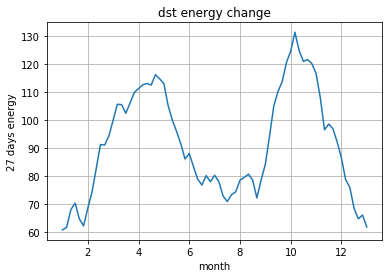

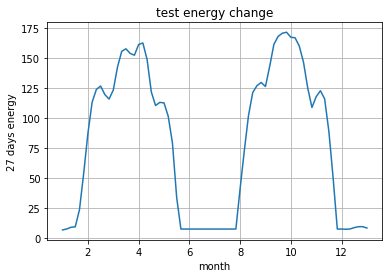

In [19]:
data_checker()

Теперь подберем параметры

В исследуемы дни пиков

$x_t = px_{t-1} + \xi_t$

$\xi_t \sim (asin(wt), D_1)$ 

---------------------------------

В минимальные дни

$x_t = px_{t-1} + \eta_t$

$\eta_t \sim (bsin(wt), D_2)$

$w = 2\pi / 27$

параметры распределения в неоптимальные дни

In [22]:
filt(data, 174, 45)
dst = data["Dst"][data["filt"]]
a1 = dst.mean()
d1 = dst.std()

filt(data, 357, 45)
dst = data["Dst"][data["filt"]]
a2 = dst.mean()
d2 = dst.std()

In [23]:
print("b = ", (a1 + a2) / 2)
print("D1 = ", np.sqrt((d1**2 + d2**2) / 2))

b =  -12.262551405172005
D1 =  19.104759685905506


Параметры в максимум

Попробуем получить те же пораметры на чистом Dst индексе

In [24]:
len(data)

20819

In [25]:
data.DOY[0]

1.0

In [26]:
N = 20819
def imitate_Dst(data, p = 0.9, a = 1):
    start_value = -20
    arr = [start_value]
    for i in range(1, N):
        new_val = p * arr[-1]
        if data["filt"][i]:
            new_val += a * np.sin(np.pi * 2 / 27)
        arr.append(new_val)
    data["sim"] = np.array(arr)
    return arr


In [37]:
def mFFT2(arr, p1, p2, norm = -1):


    if norm == -1:
        norm = len(arr)
        
    
    A = np.fft.rfft((arr - np.mean(arr)) / norm)
    n = np.arange(len(A) + 1)
    n1 = len(arr) / n[1:]
    return np.max(np.abs(A)[(p1 <= n1) & (n1 <= p2)])
    

In [41]:
def filtSim(data, day, rad):
    data["filt"] = (((data["DOY"] - day) % 365) <= rad) | ((data["DOY"] - day) % 365 >= 365 - rad)
    data["fsim"] = data["sim"] * data["filt"] + (1 - data["filt"]) * data["sim"].mean()

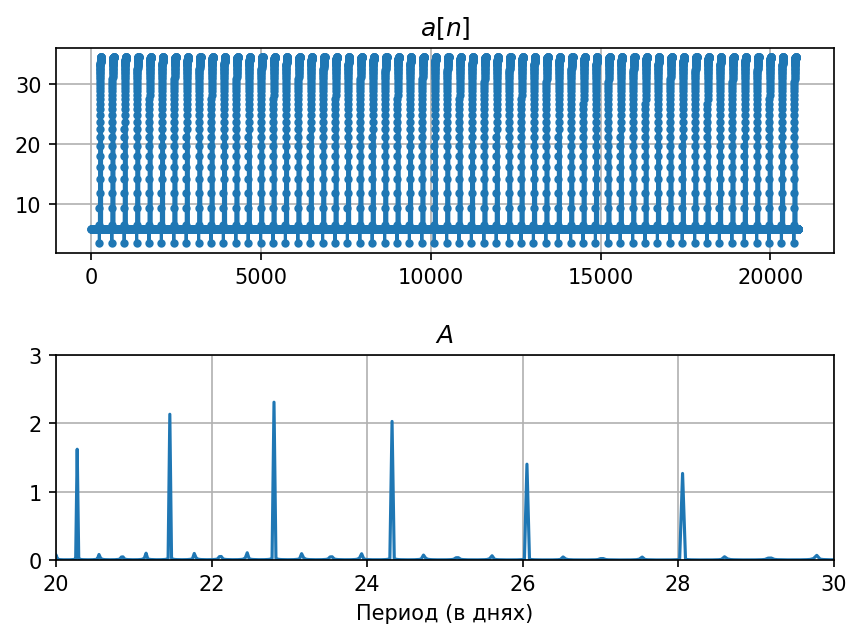

Energy of 29 = 6.282128749037577
Energy of 183 = 20.518599318680945
Relation in 183 = 0.3061675239848404


2.3105004660052173

In [45]:
imitate_Dst(data, p = 0.9, a = 15)
filtSim(data, 266, 30)
mFFT(data["fsim"], draw = True, x1 = 20, x2 = 30, y2 = 3, norm = data["filt"].sum(), energy = True)
mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())

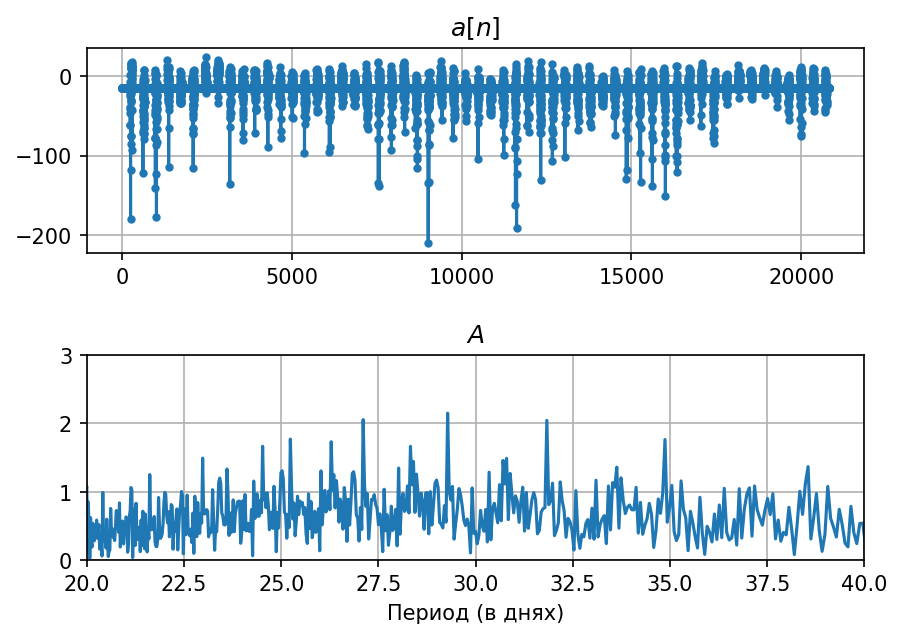

Energy of 29 = 120.4811785997127
Energy of 183 = 5.503728528453776
Relation in 183 = 21.890828731256633


2.1498813577620766

In [40]:
filt(data, 266, 30)
mFFT(data["filted"], draw = True, x1 = 20, x2 = 40, y2 = 3, norm = data["filt"].sum(), energy = True)
mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())

In [90]:
am = 14
d = 1
for i in range(100):
    if (i % 10 == 9):
        print(i)
    filt(data, 266, 30)
    imitate_Dst(data, p = 0.85, a = am)
    filtSim(data, 266, 30)
    nsim = mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

9
19
29
39
49
59
69
79
89
99


18.66175969834182

In [91]:
mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())

2.149885106606252

In [92]:
mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())

2.1498813577620766

In [93]:
am = 8
d = 1
for i in range(100):
    if (i % 10 == 9):
        print(i)
    filt(data, 173, 30)
    imitate_Dst(data, p = 0.85, a = am)
    filtSim(data, 173, 30)
    nsim = mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())
    n = mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())
    if (n > nsim):
        am += d
    else:
        am -= d
    d *= 0.9
am

9
19
29
39
49
59
69
79
89
99


10.835871403928326

In [94]:
mFFT2(data["fsim"], 20, 30, norm = data["filt"].sum())

1.2485515577745345

In [95]:
mFFT2(data["filted"], 20, 30, norm = data["filt"].sum())

1.2485515010655586

если пытаться подогнать последовательность под такие-же пики то получается a ~ 19

In [88]:
ts = pd.read_csv("verify.csv")
ts

,Unnamed: 0,Dst
0,0,-20.000000
1,1,-17.390800
2,2,8.744462
3,3,26.001364
4,4,19.665139
...,...,...
19748,19748,-2.225047
19749,19749,-11.107713
19750,19750,25.995371
19751,19751,28.570511


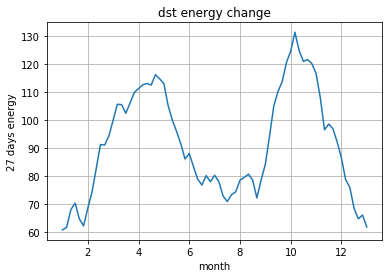

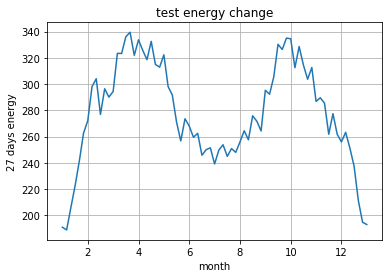

In [89]:
data_checker("verify.csv")